### 다중회귀분석
- Guerry 데이터셋: #1830년도 프랑스의 사회인구학적 데이터
- Literacy: 문해율
- Crime_prop: 재산범죄당 인구
- Wealth: 재산세 순위
- Distance: 수도 파리까지의 거리(km)
- url = 'https://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'

In [1]:
import pandas as pd
df=pd.read_csv('Data/Guerry.csv')
df.head(3)

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26


<Axes: >

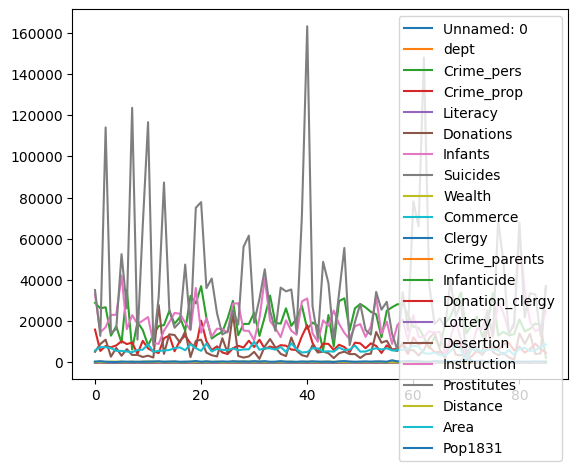

In [2]:
%matplotlib inline
df.plot()

In [3]:
df.isnull().sum()

Unnamed: 0         0
dept               0
Region             1
Department         0
Crime_pers         0
Crime_prop         0
Literacy           0
Donations          0
Infants            0
Suicides           0
MainCity           0
Wealth             0
Commerce           0
Clergy             0
Crime_parents      0
Infanticide        0
Donation_clergy    0
Lottery            0
Desertion          0
Instruction        0
Prostitutes        0
Distance           0
Area               0
Pop1831            0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.shape

(85, 24)

In [5]:
#변수 4개만 선택
df2 = df[['Crime_prop', 'Literacy', 'Wealth', 'Distance']]

In [6]:
import statsmodels.formula.api as smf
# Ordinary Least Squares(OLS) 방식
# 잔차(Residual) : 실제값과 예측값의 차
# 잔차의 제곱의 합을 최소로 하는 방식으로 회귀선을 그리는 방식
model = smf.ols(formula='Crime_prop ~ Literacy + Wealth + Distance', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Crime_prop   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.33
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           7.89e-06
Time:                        11:11:38   Log-Likelihood:                -788.25
No. Observations:                  85   AIC:                             1584.
Df Residuals:                      81   BIC:                             1594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7118.5554   1162.059      6.126      0.000    4806.423    9430.688
Literacy     -41.6264     17.664     -2.357      0.021     -76.773      -6.480
Wealth        43.4753     12.868      3.378      0.001      17.871      69.080
Distance       2.4385      3.158      0.772      0.442      -3.845       8.722
==============================================================================
Omnibus:                       26.539   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.437
Skew:                           1.238   Prob(JB):                     1.36e-10
Kurtosis:                       5.587   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Literacy', ylabel='Crime_prop'>

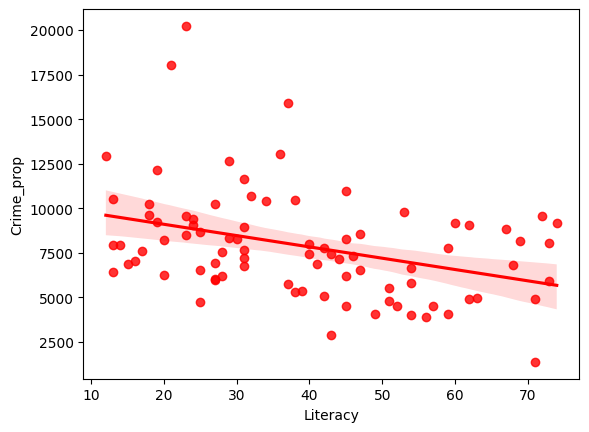

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#문해율과 범죄율(음의 상관관계)
#회귀모형그래프
sns.regplot(x='Literacy', y='Crime_prop', data=df, color='red')

<Axes: xlabel='Wealth', ylabel='Crime_prop'>

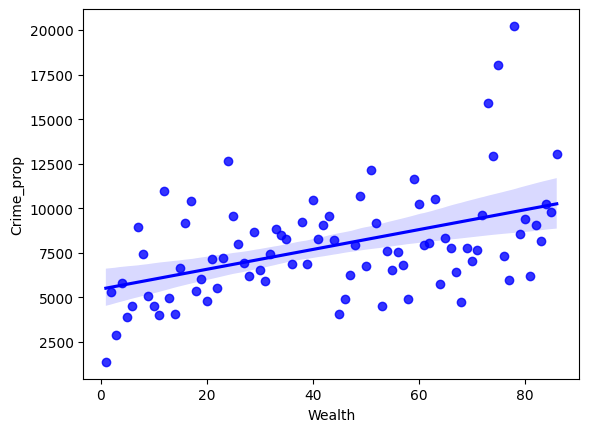

In [9]:
#재산세 순위와 범죄율
sns.regplot(x='Wealth', y='Crime_prop', data=df, color='blue')

<Axes: xlabel='Distance', ylabel='Crime_prop'>

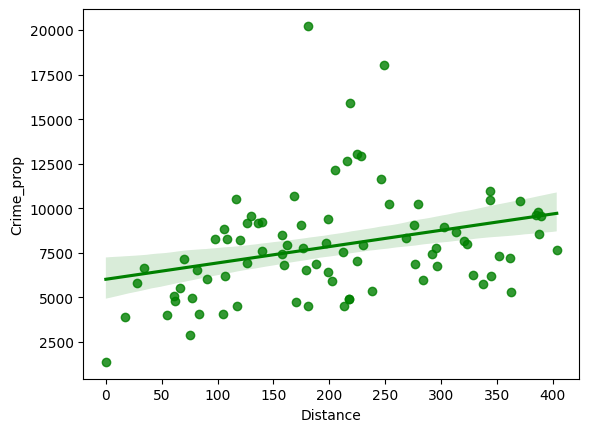

In [10]:
# 수도와의 거리와 범죄율(수도와의 거리가 멀어질수록 범죄율이 높아진다)
sns.regplot(x='Distance', y='Crime_prop', data=df, color='green')

<Axes: xlabel='Distance', ylabel='Crime_prop'>

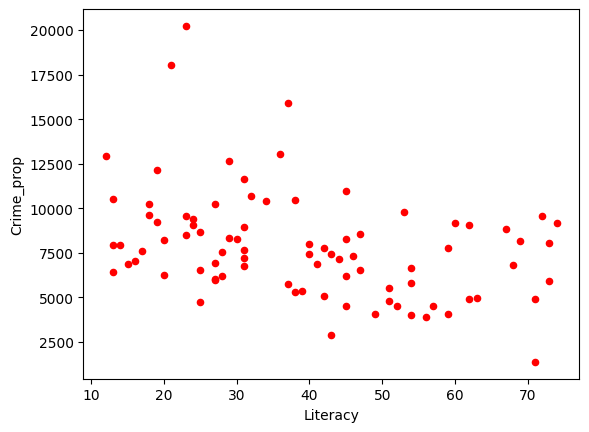

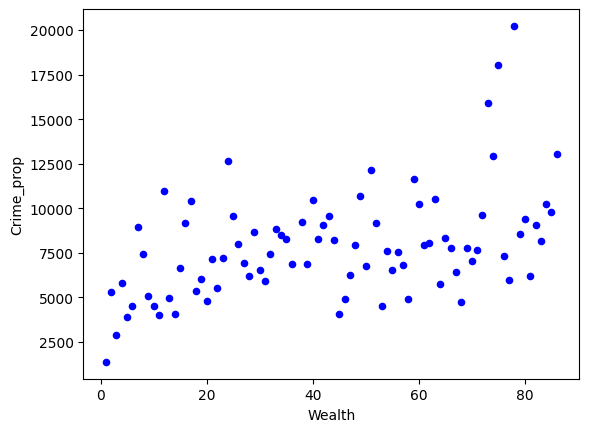

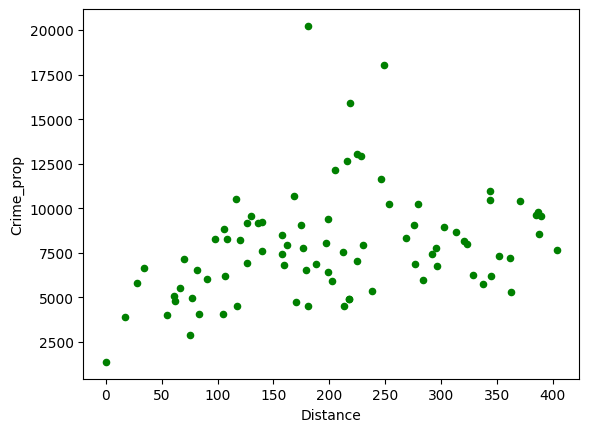

In [11]:
#산점도
df.plot('Literacy', 'Crime_prop', kind='scatter',color='red')
df.plot('Wealth', 'Crime_prop', kind='scatter', color='blue')
df.plot('Distance', 'Crime_prop', kind='scatter', color='green')

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['Literacy', 'Wealth', 'Distance']]
y = df['Crime_prop']
model.fit(X, y)

LinearRegression()

In [13]:
#문해율 80, 재산세 순위 1, 수도까지의 거리 20일 때의 범죄율
literacy = 80
wealth = 1
distance = 20
regionA = [literacy, wealth, distance]
crimeA = model.predict([regionA])
crimeA
#3880명당 1건의 범죄

c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3880.68993851])

In [14]:
#문해율 10, 재산세 순위 70, 수도까지의 거리 500일 때의 범죄율
literacy = 10
wealth = 70
distance = 500
regionB = [literacy, wealth, distance]
crimeB = model.predict([regionB])
crimeB
#10964명당 1건의 범죄

c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10964.81313077])

In [15]:
#A,B 중간 정도의 동네
#문해율 50, 재산세 순위 30, 수도까지의 거리 300일 때의 범죄율
literacy = 50
wealth = 30
distance = 300
regionC = [literacy, wealth, distance]
crimeC = model.predict([regionC])
crimeC
#7073명당 1건의 범죄

c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7073.04508028])